Exercício de hidráulica de perfuração

Bibliotecas utilizadas

In [32]:
import numpy as np
import matplotlib.pyplot as plt

Dados de entrada:
A fase de 8 ½” de um poço exploratório está sendo perfurada em uma sonda submersível em lâmina de
água de 1500m com vazão de 400 gal/min e taxa de penetração média de 15 m/h à profundidade de 3400m. O
fluido de perfuração é a base de óleo sintético, apresentando massa específica de 9,0 lb/gal, ensaiado no
viscosímetro Fann (dados do ensaio abaixo). Nesse ponto são perfurados folhelhos com massa específica de
2,7 g/cm3
. Determine:

In [33]:
Q = 400     # Vazão (gal/min)
D_broca = 8.5 
lâmina_de_agua = 1500  # m
taxa_penetração_media = 15  # m/h
L = 3400  # m
m_fluido = 9  # lb/gal 
m_cascalho = 2.7  # g/cm³ 
L_sapata = 2700 #m
pressao_porosa = 6200  #psi

Dados das deflexões em função da rotações para o cálculo do indice de comportamento e consistência

In [34]:
dados = {
    'Rotacoes (N, rpm)': [3, 6, 100, 200, 300, 600],
    'Deflexão (teta, graus)': [2, 3, 19, 30, 40, 67]
}

Função para buscar deflexão com base na rotação

In [35]:
def rotacao(rotacao):
    if rotacao in dados['Rotacoes (N, rpm)']:
        index = dados['Rotacoes (N, rpm)'].index(rotacao)
        return dados['Deflexão (teta, graus)'][index]
    else:
        return "Rotação não encontrada."

Interior da coluna

In [36]:
Np = 3.32 * np.log10(rotacao(600) / rotacao(300))
Kp = 1.067 * (rotacao(600) / 1022**Np)
print(f"Índice de Comportamento: {Np}, Consistência no interior da coluna: {Kp}")

Índice de Comportamento: 0.7437291737579086, Consistência no interior da coluna: 0.41306918134014936


Anular

In [37]:
Na = 0.5 * np.log10(rotacao(300) / rotacao(3))
Ka = 1.067 * (rotacao(300) / 511**Na)
print(f"Índice de Comportamento no anular: {Na}, Consistência no anular da coluna: {Ka}")

Índice de Comportamento no anular: 0.6505149978319906, Consistência no anular da coluna: 0.7385093442947425


Definição dos dados dos trechos

In [38]:
dados = [
    {'Trecho': 1, 'Comprimento': 3180, 'Di1': 4.276, 'Di2': None, 'Do': None, 'Número': None, 'ID': None},
    {'Trecho': 2, 'Comprimento': 80, 'Di1': 3, 'Di2': None, 'Do': None, 'Número': None, 'ID': None},
    {'Trecho': 3, 'Comprimento': 140, 'Di1': 2.8125, 'Di2': None, 'Do': None, 'Número': None, 'ID': None},
    {'Trecho': 4, 'Comprimento': 0, 'Di1': None, 'Di2': None, 'Do': None, 'Número': 3, 'ID': 1.5},
    {'Trecho': 5, 'Comprimento': 140, 'Di1': None, 'Di2': 6.25, 'Do': 8.5, 'Número': None, 'ID': None},
    {'Trecho': 6, 'Comprimento': 80, 'Di1': None, 'Di2': 5, 'Do': 8.5, 'Número': None, 'ID': None},
    {'Trecho': 7, 'Comprimento': 480, 'Di1': None, 'Di2': 5, 'Do': 8.5, 'Número': None, 'ID': None},
    {'Trecho': 8, 'Comprimento': 1200, 'Di1': None, 'Di2': 5, 'Do': 8.535, 'Número': None, 'ID': None},
    {'Trecho': 9, 'Comprimento': 1500, 'Di1': None, 'Di2': 5, 'Do': 19.75, 'Número': None, 'ID': None}
]

Função para buscar valores

In [39]:
def buscar_valor(trecho, campo):
    for dado in dados:
        if dado['Trecho'] == trecho:
            return dado.get(campo, "Campo não encontrado.")
    return "Trecho não encontrado."

a) A pressão no tubo de bengala para esse poço, explicitando as perdas de carga em cada trecho;

Cálculo das velocidades média 

Velocidades média do trecho 1 até o trecho 3:

In [40]:
velocidade1_3 = {}
for i in range(1, 4):
    di = buscar_valor(i, 'Di1') 
    if di is not None and di != 0:  
        resultado = 24.51 * Q / (di ** 2)
        velocidade1_3[i] = resultado
    else:
        velocidade1_3[i] = "Di1 não disponível ou igual a zero."

for trecho, velocidade in velocidade1_3.items():
    print(f"Velocidade média para o trecho {trecho}: {velocidade}")

Velocidade média para o trecho 1: 536.2013579392367
Velocidade média para o trecho 2: 1089.3333333333333
Velocidade média para o trecho 3: 1239.4192592592592


Velocidade média na Broca:

In [41]:
id_trecho_4 = buscar_valor(4, 'ID')   
if id_trecho_4 is not None and id_trecho_4 != 0:  
    velocidade_trecho_4 = 24.51 * Q / (id_trecho_4 ** 2) 
else:
    velocidade_trecho_4 = "Di1 não disponível ou igual a zero."
print(f"Velocidade média para o trecho 4 (usando ID): {velocidade_trecho_4}")

Velocidade média para o trecho 4 (usando ID): 4357.333333333333


Cálculo das velocidades de 5 a 9

In [42]:
velocidade5_9 = {}
for i in range(5, 10):
    do = buscar_valor(i, 'Do') 
    di = buscar_valor(i, 'Di2') 
    if do is not None and di is not None and (do**2 - di**2) != 0:  
        resultado = 24.51 * Q / (do**2 - di**2)
        velocidade5_9[i] = resultado
    else:
        velocidade5_9[i] = "Do ou Di não disponível ou cálculo inválido."

for trecho, velocidade in velocidade5_9.items():
    print(f"Velocidade média para o trecho {trecho}: {velocidade}")

Velocidade média para o trecho 5: 295.4124293785311
Velocidade média para o trecho 6: 207.4920634920635
Velocidade média para o trecho 7: 207.4920634920635
Velocidade média para o trecho 8: 204.90644768735672
Velocidade média para o trecho 9: 26.85567539804828


Cálculos da velocidades criticas 

In [43]:
velocidade_critica1_3 = {}
for i in range(1, 4):
    di1 = buscar_valor(i, 'Di1')
    if di1 is not None and di1 != 0:  
        velocidade_critica = (
            1.969 * 
            ((5 * (3470 - 1370 * Np) * Kp) / m_fluido) ** (1 / (2 * Np)) *
            ((3 * Np + 1) / (1.27 * di1 * Np)) ** (Np / (2 - Np)))
        velocidade_critica1_3[i] = velocidade_critica
    else:
        velocidade_critica1_3[i] = "Di1 não disponível ou igual a zero."

for trecho, velocidades_critica in velocidade_critica1_3.items():
    print(f"Velocidade crítica para o trecho {trecho}: {velocidades_critica}")

Velocidade crítica para o trecho 1: 121.82829359973847
Velocidade crítica para o trecho 2: 150.2687793485099
Velocidade crítica para o trecho 3: 156.12129275872567


In [44]:
velocidade_critica5_9 = {}
for i in range(5, 10):
    do = buscar_valor(i, 'Do')
    di = buscar_valor(i, 'Di2')
    
    if do is not None and di is not None and (do - di) != 0:  
        velocidade_critica = (
            1.969 * 
            (((4.08 * (3470 - 1370 * Na) * Ka) / m_fluido) ** (1 / (2 - Na))) *
            (((2 * Na + 1) / (0.64 * (do - di) * Na)) ** (Na / (2 - Na)))
        )
        velocidade_critica5_9[i] = velocidade_critica
    else:
        velocidade_critica5_9[i] = "Do ou Di não disponível ou cálculo inválido."

for trecho, velocidades_critica in velocidade_critica5_9.items():
    print(f"Velocidade crítica para o trecho {trecho}: {velocidades_critica}")

Velocidade crítica para o trecho 5: 455.1721145333502
Velocidade crítica para o trecho 6: 367.855991282053
Velocidade crítica para o trecho 7: 367.855991282053
Velocidade crítica para o trecho 8: 366.09578538830397
Velocidade crítica para o trecho 9: 183.87877740120706


Avaliação se os trechos estão em regime Laminar ou turbulento

In [46]:
for i in range(1, 10):
    if i in velocidade1_3:
        velocidade_media = velocidade1_3[i]
    elif i in velocidade5_9:
        velocidade_media = velocidade5_9[i]
    else:
        velocidade_media = "Não disponível"
    
    if i in velocidade_critica1_3:
        velocidade_critica = velocidade_critica1_3[i] if i <= 3 else None
    elif i in velocidade_critica5_9:
        velocidade_critica = velocidade_critica5_9[i] if i >= 5 else None
    else:
        velocidade_critica = "Não disponível"

    # Comparar velocidades
    if isinstance(velocidade_media, (int, float)) and isinstance(velocidade_critica, (int, float)):
        if velocidade_media < velocidade_critica:
            estado = "Laminar"
        else:
            estado = "Turbulento"
    else:
        estado = "Turbulento para Broca ou Dados insuficientes para comparação"

    print(f"Trecho {i}: Velocidade média = {velocidade_media}, Velocidade crítica = {velocidade_critica}, Estado: {estado}")

Trecho 1: Velocidade média = 536.2013579392367, Velocidade crítica = 121.82829359973847, Estado: Turbulento
Trecho 2: Velocidade média = 1089.3333333333333, Velocidade crítica = 150.2687793485099, Estado: Turbulento
Trecho 3: Velocidade média = 1239.4192592592592, Velocidade crítica = 156.12129275872567, Estado: Turbulento
Trecho 4: Velocidade média = Não disponível, Velocidade crítica = Não disponível, Estado: Turbulento para Broca ou Dados insuficientes para comparação
Trecho 5: Velocidade média = 295.4124293785311, Velocidade crítica = 455.1721145333502, Estado: Laminar
Trecho 6: Velocidade média = 207.4920634920635, Velocidade crítica = 367.855991282053, Estado: Laminar
Trecho 7: Velocidade média = 207.4920634920635, Velocidade crítica = 367.855991282053, Estado: Laminar
Trecho 8: Velocidade média = 204.90644768735672, Velocidade crítica = 366.09578538830397, Estado: Laminar
Trecho 9: Velocidade média = 26.85567539804828, Velocidade crítica = 183.87877740120706, Estado: Laminar


Cálculos dos Delta P em cada trecho:

In [49]:
deltaP_trechos_1_3 = {}
for i in range(1, 4):
    if i in velocidade1_3:
        velocidade_media = velocidade1_3[i]
    elif i in velocidade5_9:
        velocidade_media = velocidade5_9[i]
    else:
        velocidade_media = None

    if i <= 3:
        di1_value = buscar_valor(i, 'Di1')
        comprimento = buscar_valor(i, 'Comprimento')
        if di1_value is not None and di1_value != 0 and velocidade_media is not None:
            deltaP = (
                (((np.log10(Np) + 2.5) * m_fluido * (velocidade_media ** 2) * comprimento) /  #8.45 água 
                (4645029 * di1_value)) *
                ((19.36 * Kp * ((0.4 * velocidade_media * (3 * Np + 1) / (di1_value * Np)) /
                (8.45 * velocidade_media ** 2)) ** ((1.4 - np.log10(Np)) / 7)))
            )
            deltaP_trechos_1_3[i] = deltaP
        else:
            deltaP_trechos_1_3[i] = "Dados insuficientes para cálculo."
    else:
        deltaP_trechos_1_3[i] = "Não aplicável para este trecho."
for trecho, deltaP in deltaP_trechos_1_3.items():
    print(f"Delta P para o trecho {trecho}: {deltaP}")

Delta P para o trecho 1: 1026.7091887364186
Delta P para o trecho 2: 140.63126957885768
Delta P para o trecho 3: 335.07571352684147


Delta P na broca

In [50]:
trecho_4_deltaP = {}
i = 4  # Trecho 4
ID_value = buscar_valor(i, 'ID')

if ID_value is not None and ID_value != 0:
    deltaP_trecho_4 = (156 * m_fluido * Q ** 2) / (((24/ID_value) ** 2)*3) ** 2
    trecho_4_deltaP[i] = deltaP_trecho_4
else:
    trecho_4_deltaP[i] = "ID não disponível ou igual a zero."

for trecho, deltaP in trecho_4_deltaP.items():
    print(f"Delta P para o trecho {trecho}: {deltaP}")

Delta P para o trecho 4: 380.859375


Deltas P no Anular   

In [51]:
deltaP_trechos_5_9 = {}
for i in range(5, 10):
    do = buscar_valor(i, 'Do')
    di2 = buscar_valor(i, 'Di2')
    comprimento = buscar_valor(i, 'Comprimento')
    velocidade_media = velocidade5_9[i] if i in velocidade5_9 else 0 

    if do is not None and di2 is not None and comprimento is not None and (do - di2) != 0:
        deltaP = (
            (Ka * comprimento / (300 * (do - di2))) *
            ((0.8 * velocidade_media * (2 * Na + 1)) / ((do - di2) * Na) ** Na)
        )
        deltaP_trechos_5_9[i] = deltaP
    else:
        deltaP_trechos_5_9[i] = "Do, Di2 ou comprimento não disponível ou cálculo inválido."

for trecho, deltaP in deltaP_trechos_5_9.items():
    print(f"Delta P para o trecho {trecho}: {deltaP}")

Delta P para o trecho 5: 65.0129985134612
Delta P para o trecho 6: 12.584180383294918
Delta P para o trecho 7: 75.50508229976951
Delta P para o trecho 8: 183.3740328548471
Delta P para o trecho 9: 2.842788201994122


In [52]:
soma_total_deltaP = 0
for deltaP in deltaP_trechos_1_3.values():
    if isinstance(deltaP, (int, float)):
        soma_total_deltaP += deltaP

for deltaP in trecho_4_deltaP.values():
    if isinstance(deltaP, (int, float)):
        soma_total_deltaP += deltaP

for deltaP in deltaP_trechos_5_9.values():
    if isinstance(deltaP, (int, float)):
        soma_total_deltaP += deltaP
print(f"Soma total de Delta P: {soma_total_deltaP}")

Soma total de Delta P: 2222.594629095485


Cálculo da vazão no cascalho

In [54]:
Q_cascalho = 0.7*taxa_penetração_media*D_broca**2/314
Q_anular = Q_cascalho + Q
print(Q_anular)

402.41600318471336


Massa especifica aparente do fluido no anularr

In [55]:
m_anular = (Q*m_fluido+Q_cascalho*m_cascalho)/Q_anular
print(f"O peso específico no anular: {m_anular}")

O peso específico no anular: 8.962176404657775


Delta P hidrostático

In [56]:
delta_P_hidrostatico = 0.17*(m_anular-m_fluido)*L
print(f"O Delta P hidrostático: {delta_P_hidrostatico}")

O Delta P hidrostático: -21.862038107805933


A soma das perdas de carga ao longo da coluna equivale a pressão no tubo de bengala")

In [57]:
P_bengala = soma_total_deltaP + delta_P_hidrostatico
print(f"A pressão no tubo de bengala vale: {P_bengala}")

A pressão no tubo de bengala vale: 2200.732590987679


Pressão dinâmica no fundo do poço

b) A ECD no fundo do poço e na sapata;

In [58]:
soma_total_deltaP_anular = 0
for deltaP in deltaP_trechos_5_9.values():
    if isinstance(deltaP, (int, float)):
        soma_total_deltaP_anular += deltaP
        
P_dinamica_no_fundo = 0.17*m_anular*L + soma_total_deltaP_anular
print(f"A pressão dinâmica no fundo do poço: {P_dinamica_no_fundo}")

A pressão dinâmica no fundo do poço: 5519.457044145562


ECD no fundo do poço

In [59]:
Ecd_fundo = P_dinamica_no_fundo/(0.17*L)
print(f"ECD no fundo do poço: {Ecd_fundo}")

ECD no fundo do poço: 9.549233640390245


Pressão dinâmica na sapata

In [61]:
soma_total_deltaP_sapata = 0
for trecho, deltaP in deltaP_trechos_5_9.items():
    if trecho in [8, 9] and isinstance(deltaP, (int, float)):
        soma_total_deltaP_sapata += deltaP
P_dinamica_na_sapata = 0.17*m_anular*L_sapata + soma_total_deltaP_sapata
print(f"A pressão dinâmica na sapata: {P_dinamica_na_sapata}")

A pressão dinâmica na sapata: 4299.855790794761


ECD na sapata

In [62]:
Ecd_sapata = P_dinamica_na_sapata/(0.17*L_sapata)
print(f"ECD no fundo na sapata: {Ecd_sapata}")

ECD no fundo na sapata: 9.367877539857865


d) Admitindo a ocorrência de reservatório com pressão de poros de 6200psi na profundidade de 3400m, calcule o peso específico mínimo do fluido de perfuração a ser utilizado para evitar a ocorrência de kick.

Peso específico mínimo do fluido de perfuração a ser utilizado para evitar a ocorrência de kick

In [63]:
peso_especifico_minimo = pressao_porosa / L*3.28084   #3.28084 m to pés
print(f"Peso específico mínimo do fluido de perfuração: {peso_especifico_minimo:.2f} psi")

Peso específico mínimo do fluido de perfuração: 5.98 psi


e) Caso a vazão de injeção do fluido seja alterada para 200 gal/min e posteriormente para 800 gal/min, com
base nos cálculos da ECD, discuta a influência da vazão de bombeio de fluido na estabilidade do poço
durante o processo de perfuração;

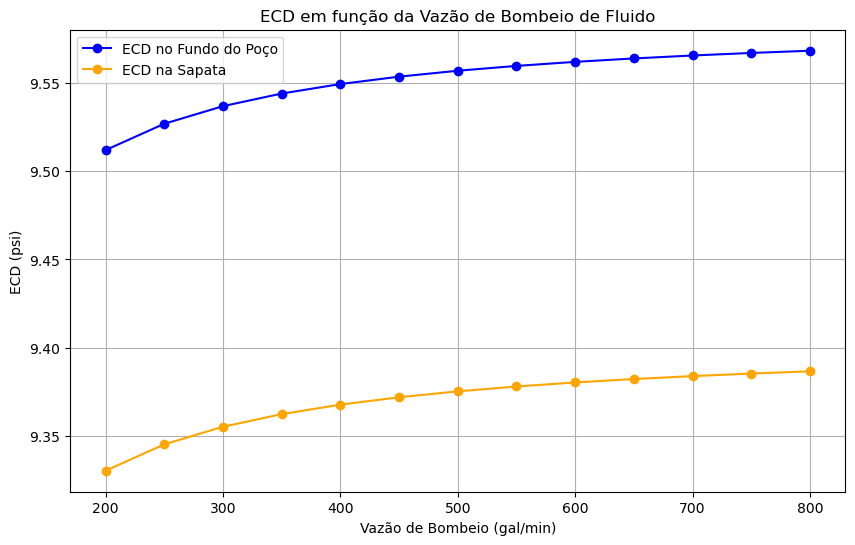

In [64]:
vazoes = [200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]  # gal/min
ecd_fundo_vazao = {}
ecd_sapata_vazao = {}

# Loop para calcular ECD para cada nova vazão
for Q_nova in vazoes:
    # Recalcular a massa específica aparente do fluido no anular
    m_anular = (Q_nova * m_fluido + Q_cascalho * m_cascalho) / (Q_nova + Q_cascalho)

    # Cálculo do delta_P hidrostático
    delta_P_hidrostatico = 0.17 * (m_anular - m_fluido) * L

    # Cálculo da pressão dinâmica no fundo do poço
    soma_total_deltaP_anular = sum(deltaP for deltaP in deltaP_trechos_5_9.values() if isinstance(deltaP, (int, float)))
    P_dinamica_no_fundo = 0.17 * m_anular * L + soma_total_deltaP_anular

    # Cálculo da ECD no fundo do poço
    Ecd_fundo = P_dinamica_no_fundo / (0.17 * L)
    ecd_fundo_vazao[Q_nova] = Ecd_fundo

    # Cálculo da pressão dinâmica na sapata
    soma_total_deltaP_sapata = sum(deltaP for trecho, deltaP in deltaP_trechos_5_9.items() if trecho in [8, 9] and isinstance(deltaP, (int, float)))
    P_dinamica_na_sapata = 0.17 * m_anular * L_sapata + soma_total_deltaP_sapata

    # Cálculo da ECD na sapata
    Ecd_sapata = P_dinamica_na_sapata / (0.17 * L_sapata)
    ecd_sapata_vazao[Q_nova] = Ecd_sapata

plt.figure(figsize=(10, 6))
plt.plot(ecd_fundo_vazao.keys(), ecd_fundo_vazao.values(), label='ECD no Fundo do Poço', marker='o', color='blue')
plt.plot(ecd_sapata_vazao.keys(), ecd_sapata_vazao.values(), label='ECD na Sapata', marker='o', color='orange')
plt.title('ECD em função da Vazão de Bombeio de Fluido')
plt.xlabel('Vazão de Bombeio (gal/min)')
plt.ylabel('ECD (psi)')
plt.legend()
plt.grid()
plt.show()

f) Plote uma curva correlacionado o peso específico do fluido e a ECD para uma variação de peso
específico de 8,0 lb/gal até 14 lb/gal. Discorra sobre a influência do peso específico do fluido na ECD.

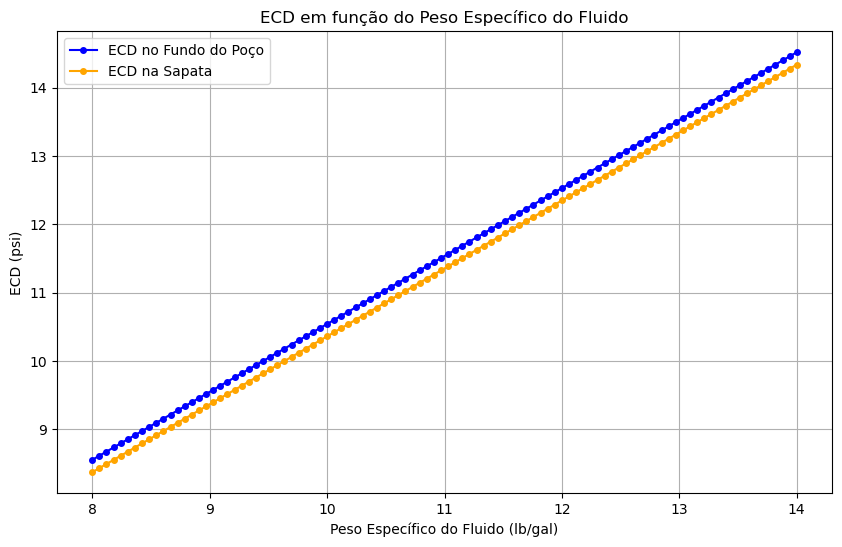

In [65]:
m_fluido_values = np.linspace(8, 14, 100)  # de 8 a 14 lb/gal
ecd_fundo_values = []
ecd_sapata_values = []

# Loop para calcular ECD para cada m_fluido
for m_fluido in m_fluido_values:
    # Recalcular a massa específica aparente do fluido no anular
    m_anular = (Q * m_fluido + Q_cascalho * m_cascalho) / (Q + Q_cascalho)

    # Cálculo do delta_P hidrostático
    delta_P_hidrostatico = 0.17 * (m_anular - m_fluido) * L

    # Cálculo da pressão dinâmica no fundo do poço
    soma_total_deltaP_anular = sum(deltaP for deltaP in deltaP_trechos_5_9.values() if isinstance(deltaP, (int, float)))
    P_dinamica_no_fundo = 0.17 * m_anular * L + soma_total_deltaP_anular

    # Cálculo da ECD no fundo do poço
    Ecd_fundo = P_dinamica_no_fundo / (0.17 * L)
    ecd_fundo_values.append(Ecd_fundo)

    # Cálculo da pressão dinâmica na sapata
    soma_total_deltaP_sapata = sum(deltaP for trecho, deltaP in deltaP_trechos_5_9.items() if trecho in [8, 9] and isinstance(deltaP, (int, float)))
    P_dinamica_na_sapata = 0.17 * m_anular * L_sapata + soma_total_deltaP_sapata

    # Cálculo da ECD na sapata
    Ecd_sapata = P_dinamica_na_sapata / (0.17 * L_sapata)
    ecd_sapata_values.append(Ecd_sapata)
 
plt.figure(figsize=(10, 6))
plt.plot(m_fluido_values, ecd_fundo_values, label='ECD no Fundo do Poço', color='blue', marker='o', markersize=4)
plt.plot(m_fluido_values, ecd_sapata_values, label='ECD na Sapata', color='orange', marker='o', markersize=4)
plt.title('ECD em função do Peso Específico do Fluido')
plt.xlabel('Peso Específico do Fluido (lb/gal)')
plt.ylabel('ECD (psi)')
plt.legend()
plt.grid()
plt.show()

g) Discorra sobre a influência da taxa de penetração na estabilidade do poço. Para fundamentar a análise
obtenha resultados da ECD com taxa de 10m/h e 40m/h.

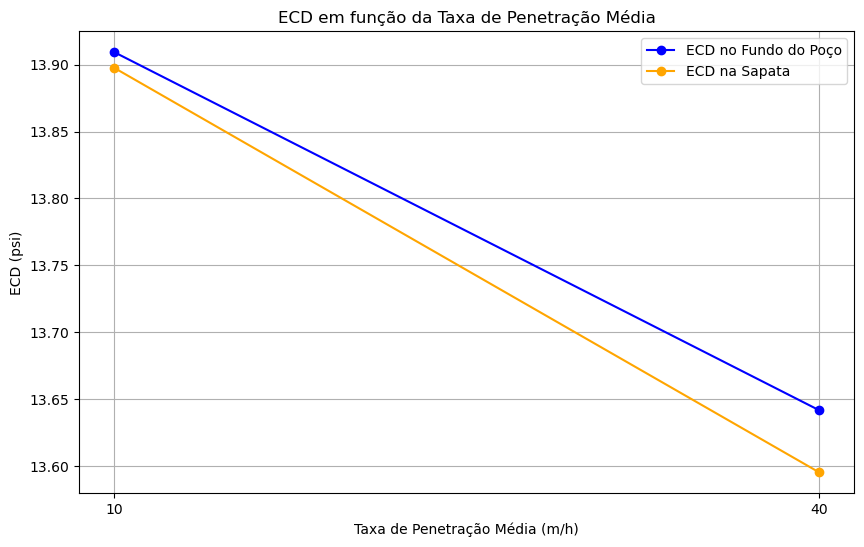

In [66]:
taxas_penetração = [10, 40]  # em m/h
ecd_fundo_values = []
ecd_sapata_values = []

for taxa_penetração_media in taxas_penetração:
    Q_cascalho = 0.7 * taxa_penetração_media * D_broca**2 / 314
    Q_anular = Q_cascalho + Q
    
    # Massa específica aparente do fluido no anular
    m_anular = (Q * m_fluido + Q_cascalho * m_cascalho) / Q_anular
    
    # Delta P hidrostático
    delta_P_hidrostatico = 0.17 * (m_anular - m_fluido) * L
    
    # Pressão dinâmica no fundo do poço
    P_dinamica_no_fundo = 0.17 * m_anular * L  # simplificado para o exemplo
    Ecd_fundo = (P_dinamica_no_fundo + delta_P_hidrostatico) / (0.17 * L)
    ecd_fundo_values.append(Ecd_fundo)

    # Pressão dinâmica na sapata
    P_dinamica_na_sapata = 0.17 * m_anular * L_sapata  # simplificado para o exemplo
    Ecd_sapata = (P_dinamica_na_sapata + delta_P_hidrostatico) / (0.17 * L_sapata)
    ecd_sapata_values.append(Ecd_sapata)

plt.figure(figsize=(10, 6))
plt.plot(taxas_penetração, ecd_fundo_values, label='ECD no Fundo do Poço', color='blue', marker='o')
plt.plot(taxas_penetração, ecd_sapata_values, label='ECD na Sapata', color='orange', marker='o')
plt.title('ECD em função da Taxa de Penetração Média')
plt.xlabel('Taxa de Penetração Média (m/h)')
plt.ylabel('ECD (psi)')
plt.xticks(taxas_penetração)
plt.legend()
plt.grid()
plt.show()